<a href="https://colab.research.google.com/github/cann-emma/DS1002-zgb8ts/blob/main/movies_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone 1: Perform EDA for movie dataset

In [ ]:
! git clone https://github.com/oak50/DS3001-Project1.git

Cloning into 'DS3001-Project1'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 122 (delta 46), reused 59 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (122/122), 5.78 MiB | 5.26 MiB/s, done.
Resolving deltas: 100% (46/46), done.


### 1. What is in your data?

We are using a dataset entitled "movie_dataset.csv", which we sourced from Kaggle. The dataset contains information about 4,803 movies across various genres, production years, and countries of origin. In the original set, there are 24 columns.

### 2. How will these data be useful for studying the phenomenon you're interested in?

We are interested in predicting trends in movie success based on indicators such as movie runtime, director, production company, and keywords associated with the film. This dataset is useful for our purposes, as it already contains a variety of information for each movie which we would otherwise have to source and combine from numerous datasets.

Some of our key variables of interest include movie runtime, director, rating, genre, popualrity score, and keywords. Our primary goal is to analyze whether there are specific "keywords" associated with films which correlate to higher rates of popularity, user rating, or box office success. For instance, we predict that movies associated with keywords such as "marvel", "fantasy", "comedy", or "adventure" might enjoy greater box office success. Because our chosen dataset contains varied indicators of movie popularity, it will be useful for our purposes.

### 3. What are the challenges you've resolved or expect to face in using them?

Potential challenges include cleaning or analyzing outliers for certain variables. For example, during EDA (which continues below) we discovered that a number of the films in the dataset had a runtime of close to 0 minutes, with a generally large spread in movie runtime overall. Thus, in continuing our analysis, we might have to evaluate whether extremely short films should be classified in another category than full-length features.

Additionally, we might encounter bias in the reported values of some variables which hinders our analysis. For example, the "popularity score" or "vote_average" variables (which measure a movie's popularity and average user rating, respectively) might be skewed by recency bias or differing amounts of internet accessibility at the time of the film's release.

### List of Key Variables in "movie_dataset.csv"

1. Variable Name: "title"
  - Description: Title of Film
  - Type: object

2. Variable Name: "budget"  
  - Description: The budget of the movie
  - Type: int

3. Variable Name: "genres"  
  - Description: The genres of the movie
  - Type: object

4. Variable Name: "keywords"
  - Description: The keywords associated with the movie  
  - Type: object

5. Variable Name: "popularity"  
  - Description: The popularity score of the movie
  - Type: float

6. Variable Name: "production_companies"  
  - Description: The production companies involved in making the movie
  - Type: object

7. Variable Name: "production_countries"
  - Description: The countries where the movie was produced
  - Type: object

8. Variable Name: "release_date"
  - Description: The release date of the movie
  - Type: object

9. Variable Name: "revenue"
  - Description: The revenue generated by the movie
  - Type: int

10. Variable Name: "runtime"
  - Description: The duration of the movie in minutes
  - Type: float

11. Variable Name: "vote_average"
  - Description: The average rating given to the movie by users
  - Type: float

12. Variable Name: "director"
  - Description: The director of the movie
  - Type: object

### Key Findings In Our EDA:
1. Directors:

    After performing analysis using the "director" variable, we discovered that a high proportion of directors included in the dataset had led only one movie. The distribution of movies per director was strongly right skewed, with a mean movie count of 1.0 and a third quartile movie count of 2.0. A few directors were outliers in terms of numbers of movies led, including Steven Spielberg (movie count = 27) and Woody Allen (movie count = 21).

2. Movie Runtime:

    Movie runtime in the dataset was quite varied. The histogram displayed a unimodel distribution with a peak around 100 minutes. This was supported by a stats table we created, which showed a median runtime of 103 minutes, a standard deviation of 26 minutes, and a max runtime of 338.0 minutes (which is over 5.5 hours).
    We run a scatterplot to assess the relationship between movie runtime and rating. The graph seemed to have a partially linear relationship, with a correlation of 0.38.

3. Genre and Revenue

    We then calculated aggregate revenue per genre based on the films in the dataset, and created a graph which included the 5 highest earners. Comedy had the highest aggregate revenue, followed by drama, rom-com, and action/sci-fi.

4. Tagline vs. Popularity

    We graphed the relationship between movie tagline length and movie popularity, finding a slight negative correlation between the two variables. This suggests that shorter, "snappier" movie taglines might be more attractive to viewers, thus generating more popularity for the movie itself.

5. Average Rating by Number of Movie Ratings

    We created a scatterplot mapping the correlation between average movie rating and number of movie reviews left by users. The correlation was positive, perhaps indicating that people are more inclined to watch movies that have positive reviews, which in turn causes these movies to garner additional positive ratings.

In [ ]:
# perform EDA

# import pandas & load dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


# load dataset into dataframe
#df = pd.read_csv('/workspace/DS3001-Project1/Data/movie_dataset.csv',low_memory=False)

# load movie_dataset.csv
df = pd.read_csv('movie_dataset.csv', low_memory=False)
df.head()


,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [ ]:

print("Shape: \n", df.shape,'\n')
# Number of rows: 4803
# Number of Columns: 24

# Look at first few rows
print( df.head() )



Shape: 
 (4803, 24) 

   index     budget                                    genres  \
0      0  237000000  Action Adventure Fantasy Science Fiction   
1      1  300000000                  Adventure Fantasy Action   
2      2  245000000                    Action Adventure Crime   
3      3  250000000               Action Crime Drama Thriller   
4      4  260000000          Action Adventure Science Fiction   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  culture clash future space war space colony so...                en   
1  ocean drug abuse exotic island east india trad...                en   
2         

In [ ]:

# print list of column names with data types:

for idx, (column, dtype) in enumerate(df.dtypes.items(), 1):
    print(f"{idx}. {column}: {dtype}")

1. index: int64
2. budget: int64
3. genres: object
4. homepage: object
5. id: int64
6. keywords: object
7. original_language: object
8. original_title: object
9. overview: object
10. popularity: float64
11. production_companies: object
12. production_countries: object
13. release_date: object
14. revenue: int64
15. runtime: float64
16. spoken_languages: object
17. status: object
18. tagline: object
19. title: object
20. vote_average: float64
21. vote_count: int64
22. cast: object
23. crew: object
24. director: object



# DIRECTORS


In [ ]:

# Create a table showing the number of movies directed by each director
director_counts = df['director'].value_counts().to_frame().reset_index()
director_counts.columns = ['Director', 'Number of Movies Directed']
print(director_counts)
print( '\n' )


               Director  Number of Movies Directed
0      Steven Spielberg                         27
1           Woody Allen                         21
2       Martin Scorsese                         20
3        Clint Eastwood                         20
4          Ridley Scott                         16
...                 ...                        ...
2344  Timothy Bjorklund                          1
2345     Marcus Dunstan                          1
2346    Lorene Scafaria                          1
2347        Jeff Lowell                          1
2348   Brian Herzlinger                          1

[2349 rows x 2 columns]




Steven Spielberg has the highest movie count with a total of 27 movies directed. He's followed up by Woody Allen and Clint Eastwood.

In [ ]:

# Create descriptive statistics table for movies per director:
director_counts = df['director'].value_counts()
descriptive_stats = director_counts.describe()
print("Descriptive Statistics for Number of Movies Per Director:")
print(descriptive_stats)


Descriptive Statistics for Number of Movies Per Director:
count    2349.000000
mean        2.031928
std         2.100398
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        27.000000
Name: count, dtype: float64


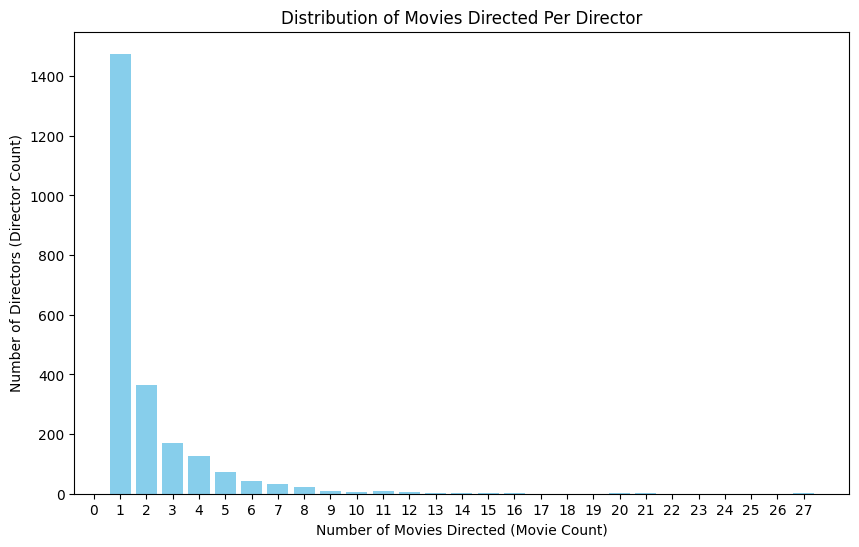

In [ ]:

# Create a histogram showing the distribution of movies directed per director:
director_counts = df['director'].value_counts()
distribution = director_counts.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(distribution.index, distribution.values, color='skyblue')
plt.xlabel('Number of Movies Directed (Movie Count)')
plt.ylabel('Number of Directors (Director Count)')
plt.title('Distribution of Movies Directed Per Director')
plt.xticks(range(0, 28))
plt.show()
print( '\n' )


This histogram is right skewed, showing a large number of directors who directed only one movie.



```
# This is formatted as code
```



# MOVIE RUNTIME IN MINUTES


In [ ]:

# Descriptive statistics for runtime:
runtime_table = df[ "runtime" ].describe()
print( "Descriptive statistics for movie runtime: \n", runtime_table )


Descriptive statistics for movie runtime: 
 count    4801.000000
mean      106.875859
std        22.611935
min         0.000000
25%        94.000000
50%       103.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64


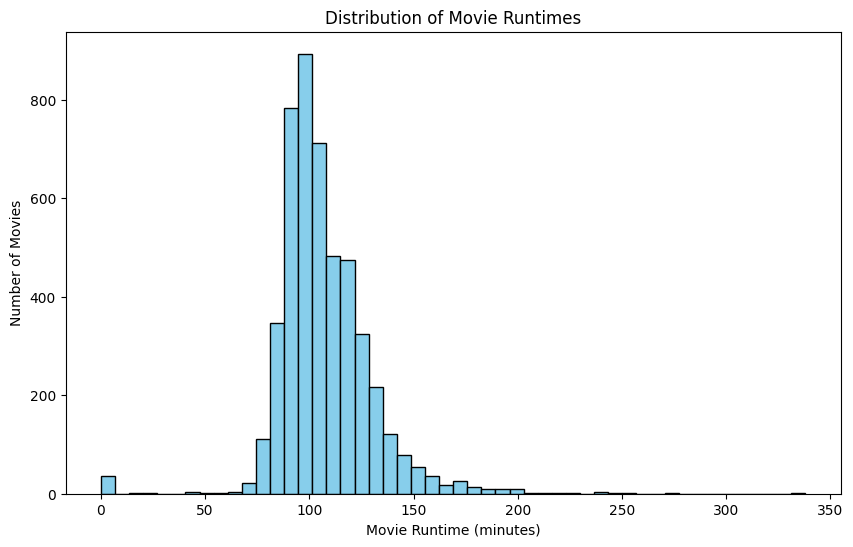

In [ ]:

# Histogram for runtime:
plt.figure(figsize=(10, 6))
plt.hist(df['runtime'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Runtimes')
plt.show()


The histogram for movie runtime appears uniform, with one peak at around 100 minutes. There is a cluster of outliers around the 0-10 minute mark.

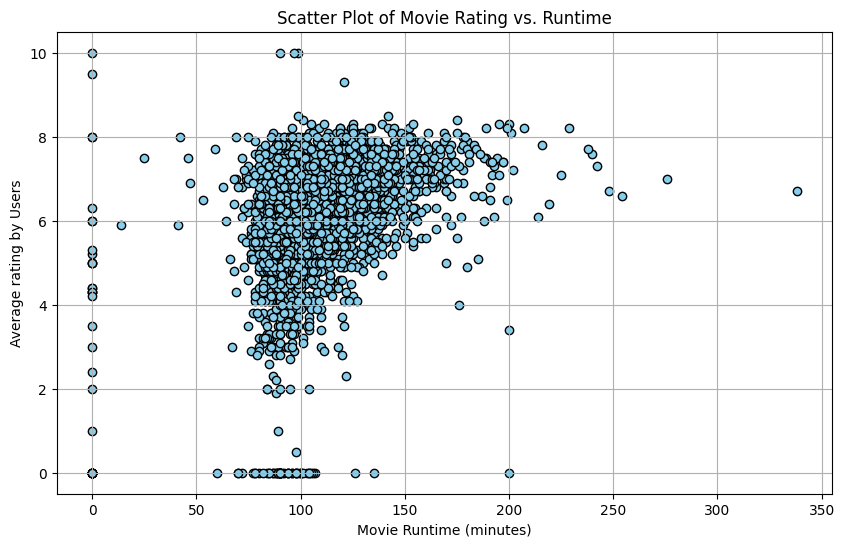

In [ ]:

# Scatterplot for runtime vs. average rating:
plt.figure(figsize=(10, 6))
plt.scatter(df['runtime'], df['vote_average'], color='skyblue', edgecolor='black')
plt.xlabel('Movie Runtime (minutes)')
plt.ylabel('Average rating by Users')
plt.title('Scatter Plot of Movie Rating vs. Runtime')
plt.grid(True)
plt.show()


Scatterplot appears nonlinear, indicating minimal correlation between runtime and user rating. It appears that movies with a very low runtime (near 0 minutes) exhibit virtually zero correlation between rating and runtime. Let's run a correlation test between runtime and rating for the entire dataset:

In [ ]:

runtime_rating_correlation = df['runtime'].corr(df['vote_average'])
print(f"Correlation between Movie Runtime and User Rating: {runtime_rating_correlation:.2f}")
# movie rating and runtime have a positive correlation of 0.38

Correlation between Movie Runtime and User Rating: 0.38


# TOTAL REVENUE BY GENRE

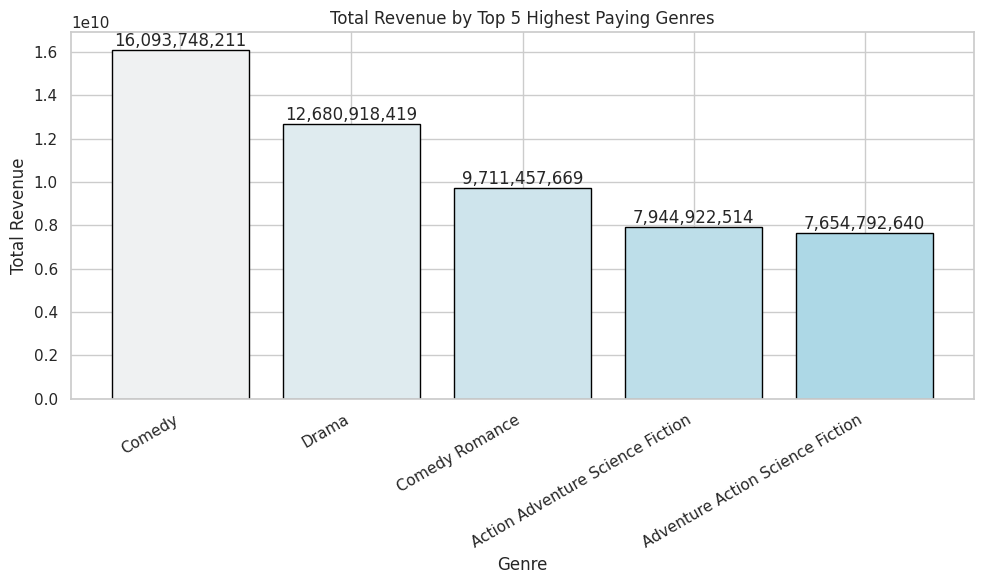

In [ ]:
# Group by genres and sum the revenue
revenue_by_genre = df.groupby('genres')['revenue'].sum().reset_index()

# Sort by revenue in descending order and select the top 5
revenue_by_genre = revenue_by_genre.sort_values(by='revenue', ascending=False).head(5)

# Set theme
sns.set_theme(style="whitegrid")

# Create a color palette with shades of blue
colors = sns.light_palette("lightblue", n_colors=len(revenue_by_genre), as_cmap=False)

# Plot a bar chart for total revenue by the top 5 genres
plt.figure(figsize=(10, 6))
bars = plt.bar(revenue_by_genre['genres'], revenue_by_genre['revenue'], color=colors, edgecolor='black')

# Curving the x-axis labels for better readability and add labels
plt.xticks(rotation=30, ha='right')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Top 5 Highest Paying Genres')

# Add labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom')  # Add formatted revenue

plt.tight_layout()
plt.show()


Comedy and Drama seem to dominate the box office, which might suggest a broader audience appeal or a larger volume of content produced in these genres. The combination of action and science fiction appears in two different genre names, indicating that films in these genres are consistently high-grossing, suggesting a trend in audience preference for action-packed and visually engaging films

# TAGLINE LENGTH AND POPULARITY SCORE

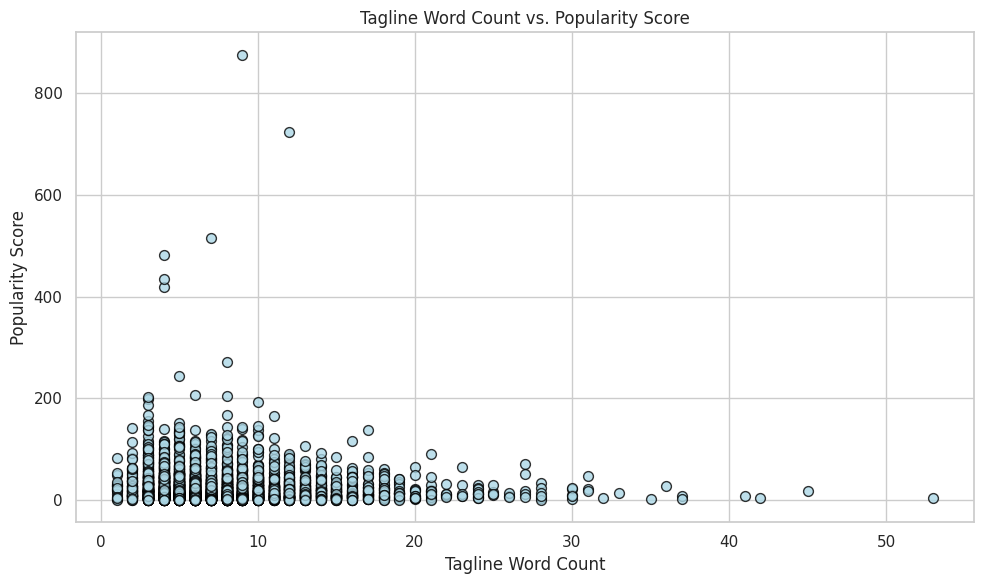

In [ ]:
# Create a new column for the number of words in the tagline
df['tagline_word_count'] = df['tagline'].str.split().str.len()

# Plotting a scatter plot of tagline word count vs. popularity score
plt.figure(figsize=(10, 6))
plt.scatter(df['tagline_word_count'], df['popularity'], alpha=0.8, color='lightblue', edgecolor='black', s=50)

# Add labels and title and display
plt.xlabel('Tagline Word Count')
plt.ylabel('Popularity Score')
plt.title('Tagline Word Count vs. Popularity Score')
plt.tight_layout()
plt.show()

Correlation between longer tagline word counts with lower popularity scores. Potential interpretation being that shorter taglines are catchier, and therefore more capitvating and alluring to viewers.  

# AVERAGE RATING BY NUMBER OF MOVIE RATINGS

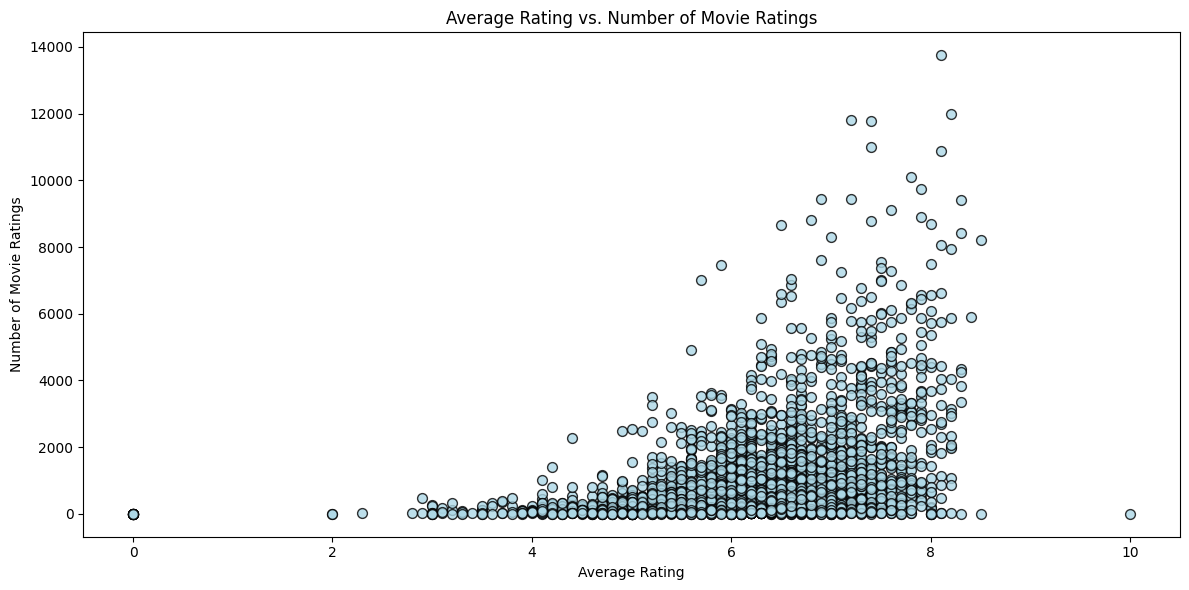

In [ ]:
# Plotting a scatter plot of tagline average rating vs. ratings count
plt.figure(figsize=(12, 6))
plt.scatter(df['vote_average'], df['vote_count'], alpha=0.8, color='lightblue', edgecolor='black', s=50)

# Add labels and title and display
plt.xlabel('Average Rating')
plt.ylabel('Number of Movie Ratings')
plt.title('Average Rating vs. Number of Movie Ratings')
plt.tight_layout()
plt.show()

Correlation between number of ratings for a movie vs its average rating. Possible interpretation is that the more people are willing watch a movie and therefore give it a rating if its ratings are good.

# MOVIE BUDGET OF COMMON GENRES
Are there differences in budget for different genres? Does it cost more to produce for certain genres of movies?

In [ ]:
print('Budget:', df['budget'].describe()) # Original budget is too hight and needs scaling

df['budget_log']= np.log(df['budget'])
print('Log Budget', df['budget_log'].describe()) #

df['budget_arch']= np.arcsinh(df['budget']) # Better scale
print('Arcsinh Budget', df['budget_arch'].describe())

Budget: count    4.803000e+03
mean     2.904504e+07
std      4.072239e+07
min      0.000000e+00
25%      7.900000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64
Log Budget count    4803.000000
mean            -inf
std              NaN
min             -inf
25%        13.579708
50%        16.523561
75%        17.504390
max        19.755682
Name: budget_log, dtype: float64
Arcsinh Budget count    4803.000000
mean       13.544155
std         7.319457
min         0.000000
25%        14.272855
50%        17.216708
75%        18.197537
max        20.448829
Name: budget_arch, dtype: float64


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


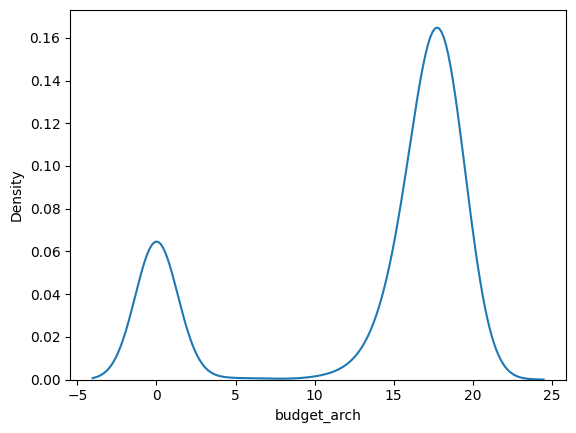

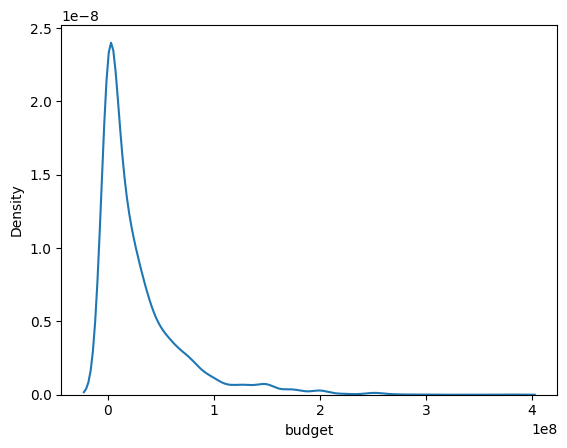

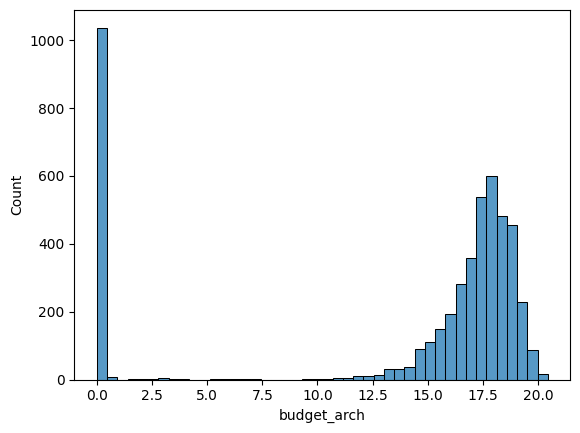

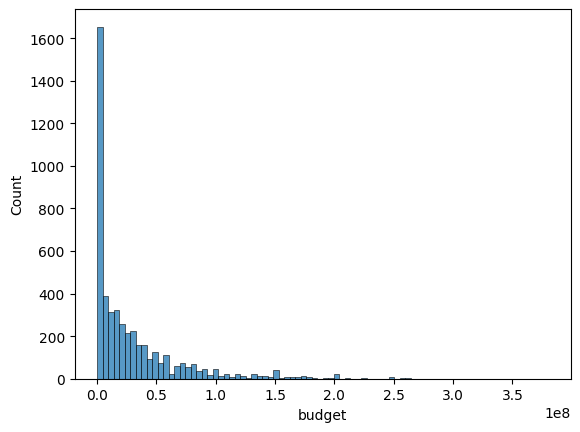

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


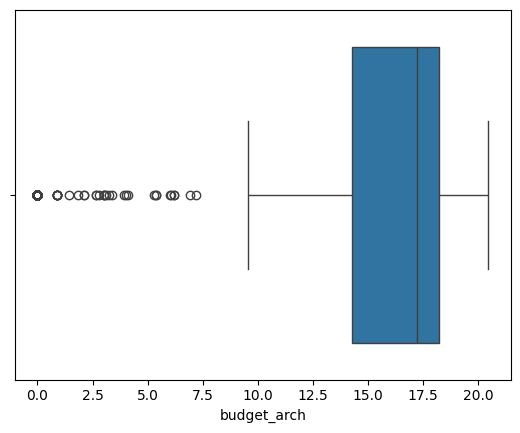

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


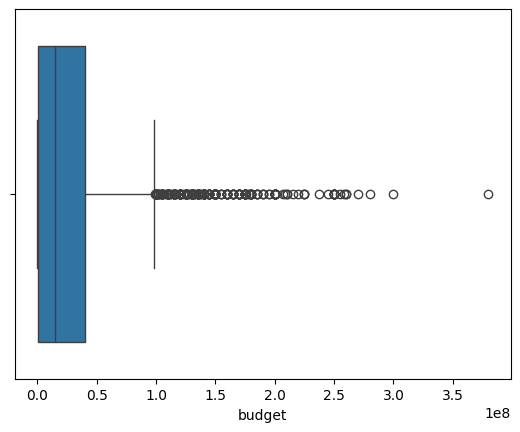

In [ ]:
sns.kdeplot(df, x= 'budget_arch') # Bimodal distribution
plt.show()

sns.kdeplot(df, x= 'budget') # Unimodal distribution
plt.show()

sns.histplot(df, x= 'budget_arch') # Data skewed left with a lot of observations at around 0
plt.show()

sns.histplot(df, x= 'budget') # Data skewed right
plt.show()

sns.boxplot(df, x= 'budget_arch') # Outliers are lower budget range movies
plt.show()

sns.boxplot(df, x= 'budget') # Outliers are higher budget range movies
plt.show()
# Contradicting results from scaled and non-scaled data

In [ ]:
df['genres'].unique() # what are the unique genres in data?
df['genres'].value_counts() # Too many genres, however, we can look at the budget for top genres

dfg= df['genres'].value_counts() # save the count of movie genres

top10_genres= dfg[0:9] # Select top 10 genres with high count
print(top10_genres)
print(top10_genres.index)

movies_topgenres= df.loc[(df['genres'].isin(['Drama', 'Comedy', 'Drama Romance', 'Comedy Romance', 'Comedy Drama',
       'Comedy Drama Romance', 'Horror Thriller', 'Documentary', 'Horror']))] # Select movies where genre is in common genres

genres
Drama                   370
Comedy                  282
Drama Romance           164
Comedy Romance          144
Comedy Drama            142
Comedy Drama Romance    109
Horror Thriller          88
Documentary              68
Horror                   64
Name: count, dtype: int64
Index(['Drama', 'Comedy', 'Drama Romance', 'Comedy Romance', 'Comedy Drama',
       'Comedy Drama Romance', 'Horror Thriller', 'Documentary', 'Horror'],
      dtype='object', name='genres')


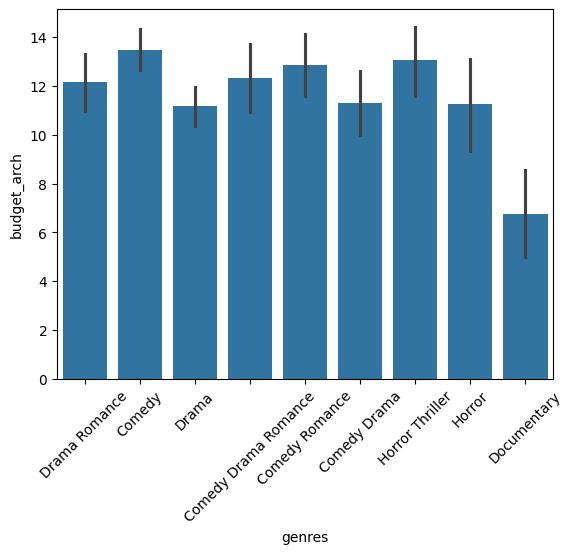

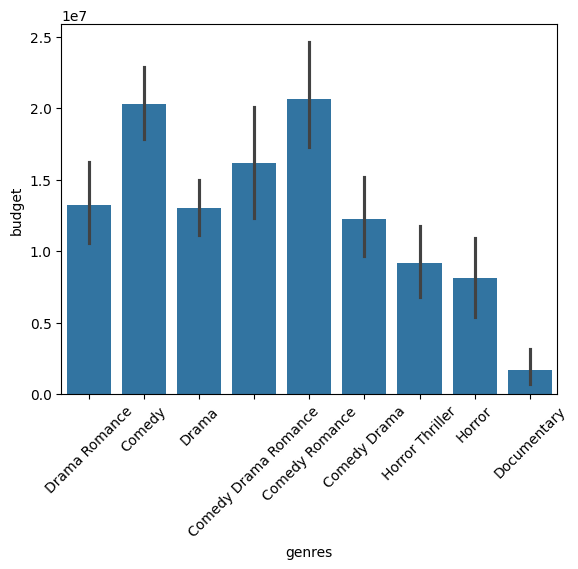

In [ ]:
# Visualize the budget of common genres in dataset
sns.barplot(movies_topgenres, x= 'genres', y= 'budget_arch')
plt.xticks(rotation= 45)
plt.show()

sns.barplot(movies_topgenres, x= 'genres', y= 'budget')
plt.xticks(rotation= 45)
plt.show()

Documentaries seem to have the lowest budgets compared to other common genres in dataset. Comedy and comedy-adjacent movies seem to have the highest budget

# What is the relationship between the budget of a movie and its popularity?

A high budget is likely associated with higher production: better visuals, audio, etc. If production is higher, then ratings will be better and a movie is more likely to be more popular. In this part, we explore what the relationship between budget and popularity is? Is there a trend? Does a higher budget correlate with more popularity?






In [ ]:
# Divide the budget into 4 quartiles and label them
df['budget_quant']= pd.qcut(df.budget, labels= ["Low", "Average", "Expensive", "Very Expensive"], q= 4)

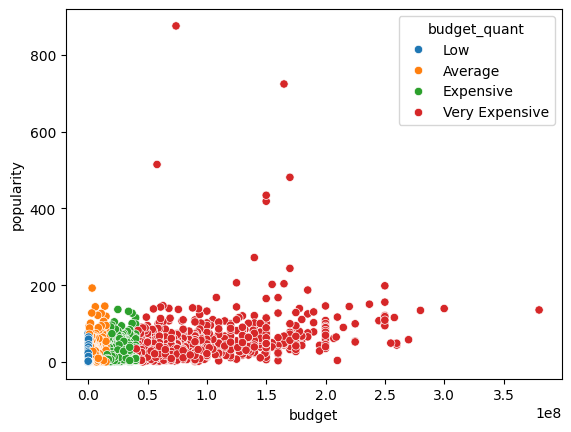

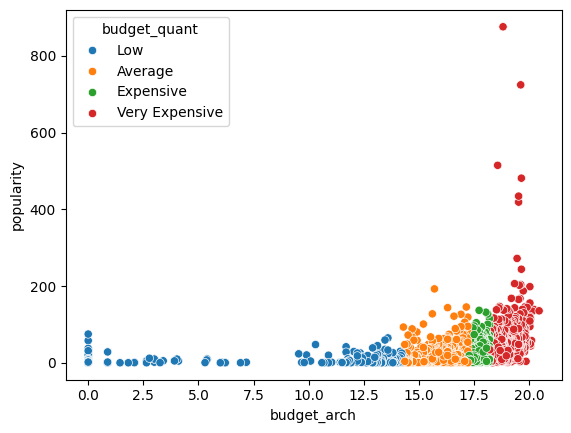

In [ ]:
# Create scatter using popularity and budget/ budget_arch to visualize relationship between these two variable and group by budget quartiles
sns.scatterplot(df, y= 'popularity', x= 'budget', hue= 'budget_quant' )
plt.show()

sns.scatterplot(df, y= 'popularity', x= 'budget_arch', hue= 'budget_quant' )
plt.show()

In [ ]:
print(f' Correlation: \n {df["budget_arch"].corr(df["popularity"])} \n')
print(f' Correlation :\n {df["budget"].corr(df["popularity"])} \n')

 Correlation: 
 0.3275802917414115 

 Correlation :
 0.5054139990665327 



There is a moderate positive relationship between a movie's budget and popularity. There are more popular movies with very expensive budgets compared to movies with low, average, and expensive budgets.